In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [16]:
dataset = pd.read_csv('clean_ibtrac.csv', low_memory=False) 

In [17]:
dataset['VMAX'] = dataset['VMAX']*0.514444

In [18]:
def duration(data):
    time_start = data[data['VMAX']>=33].iloc[0]['TIME']
    time_peak = data['TIME'][data['VMAX'].idxmax()]
    return (time_peak-time_start)

In [19]:
dataset['TIMESTAMP'] = pd.to_datetime('1858-11-17', format='%Y-%m-%d') + pd.to_timedelta(dataset.TIME, unit='d')

In [20]:
duration = dataset.groupby('CycNo').apply(duration)

In [15]:
duration[duration == 0].reset_index()['CycNo'].nunique()

101

In [8]:
duration[duration == 0]

CycNo
5852    0.0
6680    0.0
dtype: float64

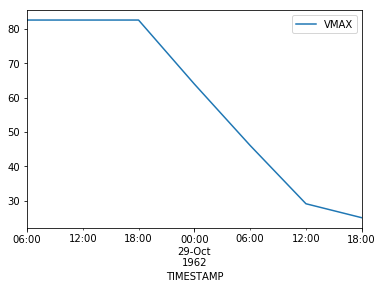

In [10]:
dataset[dataset['CycNo']==6680].plot('TIMESTAMP','VMAX')
plt.show()

In [21]:
duration = duration[duration > 0]

In [22]:
year_occur = dataset.groupby('CycNo')['YEAR'].agg(lambda x: stats.mode(x)[0][0]).reset_index()

In [23]:
useful_data = duration.to_frame().join(year_occur.set_index('CycNo'), how='left').reset_index()

In [24]:
useful_data.columns = ['CycNo', 'Duration', 'YEAR']

In [25]:
graph_data = useful_data.groupby('YEAR')['Duration'].apply(np.mean).reset_index()

In [26]:
graph_data['TIME'] = pd.to_datetime(graph_data['YEAR'],format='%Y')

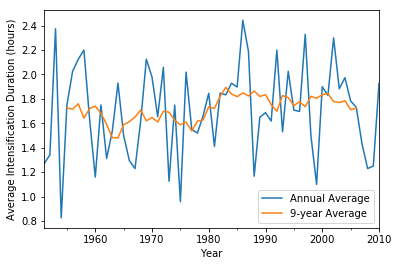

In [27]:
graph_data2 = graph_data
graph_data2 = graph_data2.set_index('TIME')

graph_data2 = graph_data2.rolling(min_periods=9, window=9, center=True).mean()
graph_data2 = graph_data2.reset_index()

ax = graph_data.plot('TIME', 'Duration', label='Annual Average')
plt.ylabel('Average Intensification Duration (hours)')
graph_data2.plot('TIME', 'Duration', ax=ax, label='9-year Average')
plt.xlabel('Year')
# plt.gcf().set_size_inches(10,10)
plt.show()

In [28]:
graph_data.to_csv('int_duration.csv',index=False)